# Лабораторная работа №3


## Задание


---


+ Выберите набор данных (датасет) для решения задачи классификации или регрессии.

+ С использованием метода train_test_split разделите выборку на обучающую и тестовую.

+ Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.

+ Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
Сравните метрики качества исходной и оптимальной моделей.

## Загрузка данных


---

In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict
%matplotlib inline 
sns.set(style="ticks")

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, LeaveOneOut, validation_curve

# Загрузка датасета
data = load_breast_cancer(as_frame = True)

## Разделение на обучающую и тестовую выборки


---


In [ ]:
# Разделение на обучающую и тестовую выборке
xtrain, xtest, ytrain, ytest = train_test_split(
    data.data, data.target, test_size=0.5, random_state=1)

## Модель для произвольно заданного гиперпараметра


---


In [ ]:
# Обучение модели
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

Train accuracy:  0.98
Test accuracy:  0.8840552651232263


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


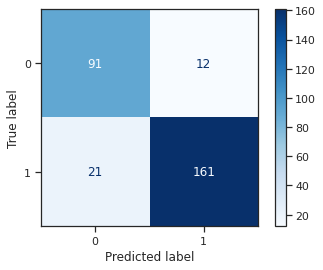

In [ ]:
# Получение метрик
print('Train accuracy: ', balanced_accuracy_score(ytrain, knc.predict(xtrain)))
print('Test accuracy: ', balanced_accuracy_score(ytest, knc.predict(xtest)))
plot_confusion_matrix(knc, xtest, ytest, 
                      display_labels=data.target.unique(), cmap=plt.cm.Blues)

In [ ]:
# Оценка качества модели с использованием кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data.data, data.target, 
                         cv=LeaveOneOut())
np.mean(scores)

0.9086115992970123

## Подбор гиперпараметров


---

In [ ]:
# Подбор гиперпараметров на основе решетчатого поиска
n_range = np.array(range(2,100))
tuned_parameters = [{'n_neighbors': n_range}]
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='balanced_accuracy')
clf_gs.fit(data.data, data.target)
clf_gs.best_params_

{'n_neighbors': 12}

In [ ]:
# Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs.best_estimator_.fit(xtrain, ytrain)
train_pred = clf_gs.best_estimator_.predict(xtrain)
test_pred = clf_gs.best_estimator_.predict(xtest)

Train accuracy:  0.9415727391874181
Test accuracy:  0.9030993278566094


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


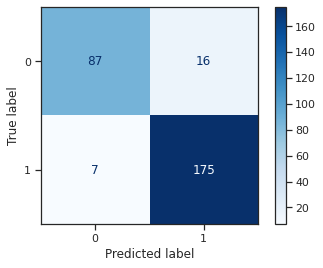

In [ ]:
# Получение метрик
print('Train accuracy: ', balanced_accuracy_score(ytrain, clf_gs.predict(xtrain)))
print('Test accuracy: ', balanced_accuracy_score(ytest, clf_gs.predict(xtest)))
plot_confusion_matrix(clf_gs, xtest, ytest, 
                      display_labels=data.target.unique(), cmap=plt.cm.Blues)

In [ ]:
# Оценка качества модели с использованием кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=12), 
                         data.data, data.target, 
                         cv=LeaveOneOut())
np.mean(scores)

0.9367311072056239

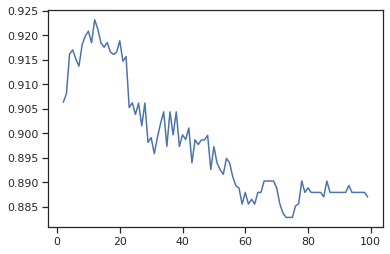

In [ ]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='balanced_accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

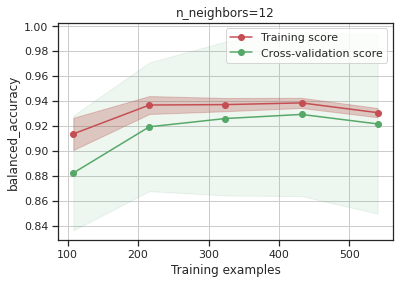

In [ ]:
# Кривая обучения
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=12', 
                    data.data, data.target, cv=20, train_sizes=np.linspace(.2, 1.0, 5))

In [ ]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='balanced_accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

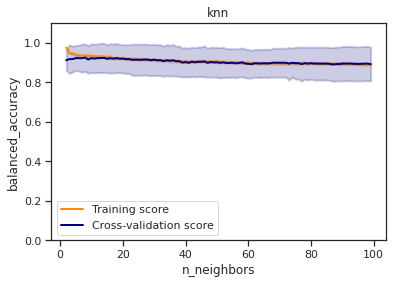

In [ ]:
plot_validation_curve(clf_gs.best_estimator_, 'knn', 
                      data.data, data.target, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="balanced_accuracy")